## 목적 : Himawari-8 NetCDF4 파일 읽고, 그림을 그려본다.

- 필요한 라이브러리 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
from pyhdf.SD import SD, SDC             # hdf4 라이브러리
import pandas as pd

 - 함수 정의

In [2]:
# MODIS granule 경계선 그리는 함수
def plot_modis_granule(fname, 
                       llcrnrlat, 
                       llcrnrlon, 
                       urcrnrlat,
                       urcrnrlon):
    
    # 위/경도 값 읽기
    f = SD('/storage1/jhlee/NMSC_2018/MOD06_L2/' + fname, SDC.READ)
    lat = f.select('Latitude')[:]
    lon = f.select('Longitude')[:]
        
        
    # 지도 설정
    m = Basemap(llcrnrlat = llcrnrlat, 
                llcrnrlon = llcrnrlon, 
                urcrnrlat = urcrnrlat, 
                urcrnrlon = urcrnrlon)     
    
    # 좌표변환 : lon, lat -> x, y
    x, y = m(lon, lat)
    
    return x, y
    
    
# Himawari-8 CTH 그림 그리는 함수
def plot_himawari8_cth(fname, 
                       llcrnrlat, 
                       llcrnrlon, 
                       urcrnrlat, 
                       urcrnrlon,
                       x_modis,
                       y_modis,
                       output):
    
    
    # 위/경도, 운정고도 값 읽기  
    f = Dataset('/storage1/jhlee/NMSC_2018/Himawari_8_AHI/' + fname, 'r')
    lat = f.variables['latitude'][:]
    lon = f.variables['longitude'][:]
    cth = f.variables['CLTH'][:]

    
    # 그림 크기 설정
    plt.figure(figsize = (6,6))

    
    # 지도 설정
    m = Basemap(llcrnrlat = llcrnrlat, 
                llcrnrlon = llcrnrlon, 
                urcrnrlat = urcrnrlat, 
                urcrnrlon = urcrnrlon, 
                resolution = 'c')
    
    # 지도 세부 설정 
    m.drawcoastlines()  
    m.drawmapboundary() # 그림 경계선
    m.drawparallels(np.arange(llcrnrlat, urcrnrlat+1, 5), labels = [1,0,0,0]) # 가로선
    m.drawmeridians(np.arange(llcrnrlon, urcrnrlon+1, 5), labels = [0,0,0,1]) # 세로선

    
    # 좌표변환 : lon, lat -> x, y
    x, y = m( *np.meshgrid(lon, lat) )

    
    cth[np.where(y < y_modis[0].min())] = np.nan  
#    cth[np.where(y > y_modis[-1].max())] = np.nan
#    cth[np.where(x > np.min(x_modis[:,0]))] = np.nan
#    cth[np.where(x < np.min(x_modis[:,-1]))] = np.nan


    # MODIS Granule 경계선 그리기
    m.plot(x_modis[0], y_modis[0], 'k')        # bottom
    m.plot(x_modis[:,0], y_modis[:,0], 'k')    # right
    m.plot(x_modis[:,-1], y_modis[:,-1], 'k')  # left
    m.plot(x_modis[-1], y_modis[-1], 'k')      # top
      

    # 운정고도 그림 그리기
    m.pcolormesh(x, y, cth, cmap = 'jet')

    
    # 컬러바 그리기
    plt.clim(0,20) # 컬러바 범위 지정
    m.colorbar(label = 'Cloud Top Height [km]')

    
    # 그림 제목 설정
    plt.title('Himawari-8 cloud top height')

    
    # 그림 저장
    plt.savefig('../figure/Himawari8/' + output, 
                bbox_inches = 'tight',
                pad_inches = 0,
                dpi = 300)

- 함수 입력값 정의

In [3]:
fname_hima = 'NC_H08_20171103_0530_L2CLP010_FLDK.02401_02401.nc'
fname_modis = 'MYD06_L2.A2017307.0510.061.2018011035049.hdf'
llcrnrlat = 15 #20
llcrnrlon = 105 #110
urcrnrlat = 45 #40
urcrnrlon = 135 #130
output = 'Himawari8_201711030530.png'

 - 그림 그리기

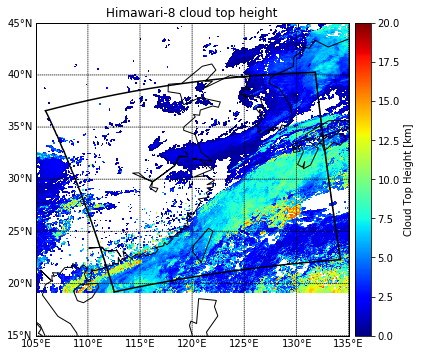

In [4]:
x_modis, y_modis = plot_modis_granule(fname_modis,
                                      llcrnrlat,
                                      llcrnrlon,
                                      urcrnrlat,
                                      urcrnrlon)

plot_himawari8_cth(fname_hima,
                   llcrnrlat,
                   llcrnrlon,
                   urcrnrlat,
                   urcrnrlon,
                   x_modis,
                   y_modis,
                   output)